In [1]:
from langchain_core.messages import HumanMessage,AIMessage,SystemMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent
from langchain_ollama import ChatOllama

In [ ]:
def solve_expression(expression:str)->str:
    '''return a value after evalutating a python expression using the "eval()" function'''
    return eval(expression)

# Create the agent
model = ChatOllama(model="qwen3:1.7b")
tools = [solve_expression]
agent_executor = create_react_agent(model, tools)

In [68]:
# Use the agent
outt=""
outtt=""
for step in agent_executor.stream(
    {"messages": [HumanMessage(content="solve 1-5*3/2")]},
    stream_mode="values",
):
    outt+=step["messages"][-1].pretty_repr()+"\n"
    outtt+=step["messages"][-1].text()+"\n"

In [63]:
print(outt)

================================ Human Message =================================

solve 1-5*3/2
================================== Ai Message ==================================

<think>
Okay, the user wants to solve the expression 1 - 5 * 3 / 2. Let me think about the order of operations here. According to PEMDAS, multiplication and division are done before subtraction. So first, I need to calculate 5 * 3, which is 15. Then divide that by 2, giving 7.5. Finally, subtract that from 1. So 1 - 7.5 equals -6.5. I should use the solve_expression function to evaluate this. The function will handle the calculation using eval(), so I just need to pass the expression as a string. Let me make sure the expression is correctly formatted: "1-5*3/2". The function should return -6.5. Alright, time to call the function.
</think>
Tool Calls:
  solve_expression (02440914-48bc-4f25-83d0-d09bac27d657)
 Call ID: 02440914-48bc-4f25-83d0-d09bac27d657
  Args:
    expression: 1-5*3/2
==========================

In [16]:
res=agent_executor.invoke(
    {"messages": [HumanMessage(content="solve 1-5*3/2")]},
)

In [ ]:
output=""
for file in res.get("messages"):
    output+=file.content+"\n"

In [69]:
from markdown import markdown
with open("text.html","w",encoding="utf-8") as f:
    f.write(markdown(outt))
with open("text.md","w",encoding="utf-8") as f:
    f.write(outtt)

In [49]:
from pprint import pformat,pprint
pprint(res)

{'messages': [HumanMessage(content='solve 1-5*3/2', additional_kwargs={}, response_metadata={}, id='4aed7527-54ab-46f2-91b9-5e830e7bce83'),
              AIMessage(content='<think>\nOkay, the user wants to solve the expression 1 - 5 * 3 / 2. Let me think about the order of operations here. According to PEMDAS, multiplication and division are done before subtraction. So first, I need to calculate 5 * 3, which is 15. Then divide that by 2, giving 7.5. Now subtract that from 1: 1 - 7.5 equals -6.5. Wait, but the tool they provided is called solve_expression, which uses eval(). Let me check if the expression is correctly formatted. The expression would be "1 - 5 * 3 / 2". Eval should handle that. So I should call the function with this expression. The result should be -6.5. I need to make sure the tool call is correctly structured with the expression parameter.\n</think>\n\n', additional_kwargs={}, response_metadata={'model': 'qwen3:1.7b', 'created_at': '2025-06-14T18:05:22.592536Z', 'done

In [80]:
open("text.md","w",encoding="utf-8").write(res.get("messages")[0].content+"\n"+res.get("messages")[-1].content)

495

In [2]:
import datetime
def solve_expression(expression:str)->str:
    '''return a value after evalutating a python expression using the "eval()" function'''
    return eval(expression)

def get_date():
    '''return today's date'''
    return datetime.datetime.now()

def get_info()->list[str]:
    '''return todays news'''
    return ["Over 80 Killed In Iran, Israel As Missiles Pound Middle East: 10 Points",
            "PM Modi on key 3-nation tour: Cyprus, Canada, Croatia on itinerary; what's on his agenda?",
            "7 killed in helicopter crash in Uttarakhand, chopper services shut"]

model = ChatOllama(model="qwen3:1.7b")
tools = [solve_expression,get_date,get_info]
agent = create_react_agent(model, tools)

In [6]:
# Use the agent
output=""
for step in agent.stream(
    {"messages": [HumanMessage(content=input("message"))]},
    stream_mode="values",
):
    output+=step["messages"][-1].pretty_repr()+"\n"

In [7]:
print(output)

================================ Human Message =================================

importent news today
================================== Ai Message ==================================

<think>
Okay, the user is asking for today's important news. Let me check the available tools. There's a function called get_info which retrieves today's news. I don't need any parameters for that. So I should call get_info to fetch the news. Let me make sure there's no other functions related to news. The other functions are for solving expressions and getting the date. So definitely, get_info is the right choice here. I'll generate the tool call accordingly.
</think>
Tool Calls:
  get_info (8bef133b-a00a-4c58-9b1f-25a9f7c8c4f0)
 Call ID: 8bef133b-a00a-4c58-9b1f-25a9f7c8c4f0
  Args:
================================= Tool Message =================================
Name: get_info

["Over 80 Killed In Iran, Israel As Missiles Pound Middle East: 10 Points", "PM Modi on key 3-nation tour: Cyprus, Canada, Croa

In [8]:
open("text.md","w",encoding="utf-8").write(output)

2190

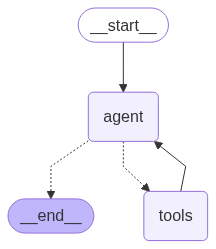

In [4]:
from IPython.display import Image
Image(agent.get_graph().draw_mermaid_png())

In [14]:
# Use the agent
from langchain_core.runnables.config import RunnableConfig
import datetime

memory=MemorySaver()

def solve_expression(expression:str)->str:
    '''return a value after evalutating a python expression using the "eval()" function'''
    return eval(expression)

def get_date():
    '''return today's date'''
    return datetime.datetime.now()


model = ChatOllama(model="qwen3:1.7b")
tools = [solve_expression,get_date]
agent = create_react_agent(model, tools)

config:RunnableConfig = {"configurable": {"thread_id": "abc123"}}
while True:
    x=input()
    if x=="q":
        break
    for step in agent.stream(
        {"messages": [HumanMessage(content=x)]},
        config,
        stream_mode="values",
    ):
        step["messages"][-1].pretty_print()

================================ Human Message =================================

hi am kshithij
================================== Ai Message ==================================

<think>
Okay, the user said "hi am kshithij". First, I need to understand what they're asking for. They might be introducing themselves. Since there's no specific question, I should respond politely. Let me check the available tools. The functions are solve_expression, get_date, and get_info. None of these apply here. So, I'll just greet them and ask if there's anything else they need help with. Keep it friendly and open-ended.
</think>

Hello! Welcome, Kshithij. How can I assist you today? 😊
================================ Human Message =================================

whats my name
================================== Ai Message ==================================

<think>
Okay, the user is asking, "whats my name?" They want to know their own name. Let me check the tools provided.

Looking at the available f

In [59]:
# from os import listdir
# import itertools
# from pprint import pprint
# path="./hi"
# all_file=[path]
# result=[]

# def get_allfiles(path):
#     global all_file,result
#     print(all_file,1)
#     if len(all_file)==0:
#         return
#     temp=all_file.pop()
#     print(all_file,2)
#     try:
#         (listdir(temp))
#     except:
#         get_allfiles(path)
#     result.append({temp:listdir(path+"/"+temp)})
#     for i in listdir(temp):
#         all_file.append(i)
#     get_allfiles(path)  
    
# get_allfiles(path)

In [130]:
from os import listdir
import itertools
from pprint import pprint

all_file=[]

def files_tool(path):
    global all_file
    all_file=[{path:listdir(path)}]

    def get_allfiles1(path):
        for i in open(".foldignore","r").read().split("\n"):
            if i in path:
                return False
        try:
            listdir(path)
        except:
            return False
        for i in listdir(path):
            temp=path+"/"+i
            if get_allfiles1(temp):
                all_file.append({temp:listdir(temp)})
        return True
    get_allfiles1(path)
    return all_file
    

In [131]:
pprint(files_tool("."))

[{'.': ['.env',
        '.foldignore',
        '.git',
        '.gitignore',
        '.venv',
        'idea.excalidraw',
        'my-app',
        'output.png',
        'test.ipynb',
        'test.py',
        'test1.ipynb',
        'test1.py',
        'test_agent.py',
        'text.html',
        'text.md',
        '__pycache__']},
 {'./.git/hooks': ['applypatch-msg.sample',
                   'commit-msg.sample',
                   'fsmonitor-watchman.sample',
                   'post-update.sample',
                   'pre-applypatch.sample',
                   'pre-commit.sample',
                   'pre-merge-commit.sample',
                   'pre-push.sample',
                   'pre-rebase.sample',
                   'pre-receive.sample',
                   'prepare-commit-msg.sample',
                   'push-to-checkout.sample',
                   'sendemail-validate.sample',
                   'update.sample']},
 {'./.git/info': ['exclude']},
 {'./.git/logs/refs/heads': ['ma

In [3]:
with open("test.txt","w") as f:
    f.write("")

In [97]:
from langchain_core.runnables.config import RunnableConfig
from langgraph.prebuilt import create_react_agent
from langchain_ollama import ChatOllama
from langchain_core.tools import tool
import os

from pydantic import BaseModel

class CreateFileInput(BaseModel):
    file_name: str
    file_content: str
    file_path: str = "."  # default value


@tool(args_schema=CreateFileInput)
def create_file(file_name:str, file_content:str, file_path:str) -> str:
    """
    Create a file with the given name at the specified path and write the provided content to it.

    Args:
        name (str): The name of the file to create.
        path (str): The directory path where the file will be created.
        content (str): The content to write into the file.

    Returns:
        str: "done" if successful, otherwise the exception message.
    """
    try:
        open(os.path.join(file_path,file_name),"w").write(file_content)
    except Exception as e: 
        return str(e)
    return "done"

@tool
def files_tool(path:str)->list[str]:
    """
    List all files in the given directory, recursively, ignoring paths listed in '.foldignore'.

    Args:
        path (str): The root directory path to search for files.

    Returns:
        list: A list of file paths found under the given directory.
    """
    global all_file
    all_file=[path+"/"+i for i in os.listdir(path)]

    def get_allfiles1(path):
        for i in open(".foldignore","r").read().split("\n"):
            if i in path:
                return False
        try:
            os.listdir(path)
        except:
            return False
        for i in os.listdir(path):
            temp=path+"/"+i
            if get_allfiles1(temp):
                for j in os.listdir(temp):
                    all_file.append(os.path.join(temp,j))
        return True
    get_allfiles1(path)
    
    return all_file

model = ChatOllama(model="qwen3:4b")


tools = [create_file,files_tool]


agent = create_react_agent(model, tools)
config:RunnableConfig = {"configurable": {"thread_id": "abc123"}}
while True:
    x=input()
    if x=="q":
        break
    for step in agent.stream(
        {"messages": [HumanMessage(content=x)]},
        config,
        stream_mode="values",
    ):
        step["messages"][-1].pretty_print()

================================ Human Message =================================

how many python files are there in D:\visual\gem_agent\
================================== Ai Message ==================================

<think>
Okay, the user is asking how many Python files are in the directory D:\visual\gem_agent\. Let me figure out how to approach this.

First, I need to list all the files in that directory and its subdirectories. The available tools include the files_tool, which can list files recursively. So I should use that first. The function takes a path parameter, so I'll set path to "D:\visual\gem_agent\".

Once I have the list of files, I need to count how many of them have the .py extension. So after getting the list, I can iterate through each file path, check if it ends with .py, and increment a counter.

Wait, the files_tool returns a list of file paths. So I'll call files_tool with the given path. Then process the results to count the Python files. I should make sure to

In [4]:
print(create_file.args_schema.schema_json(indent=4))

{
    "properties": {
        "file_name": {
            "title": "File Name",
            "type": "string"
        },
        "file_content": {
            "title": "File Content",
            "type": "string"
        },
        "file_path": {
            "default": ".",
            "title": "File Path",
            "type": "string"
        }
    },
    "required": [
        "file_name",
        "file_content"
    ],
    "title": "CreateFileInput",
    "type": "object"
}


C:\Users\kshit\AppData\Local\Temp\ipykernel_25640\3357534525.py:1: PydanticDeprecatedSince20: The `schema_json` method is deprecated; use `model_json_schema` and json.dumps instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  print(create_file.args_schema.schema_json(indent=4))


In [23]:
from langchain_community.document_loaders import FileSystemBlobLoader
from langchain_community.document_loaders.generic import GenericLoader
from langchain_community.document_loaders.parsers import PyPDFParser

loader = GenericLoader(
    blob_loader=FileSystemBlobLoader(
        path="./test_ data/",
        glob="*.pdf",
    ),
    blob_parser=PyPDFParser(),
)

In [30]:
import pprint
docs = loader.load()
print(docs[10].page_content)
pprint.pp(docs[10].metadata)

I couldn’t find a practical book that explained 
how
 to change the way you
think.
That’s why I wrote this little book. It contains everything I’ve learned about
thinking. My goal is to give you at least 
one
 idea that you can use to improve
your thoughts, and consequently, your life, business, or career. That’s why I
share all my best ideas here. 
I wrote THINK STRAIGHT in a way that you
can read it more than once. And I hope this book serves as an anchor to you
—especially during trying times.
To keep this book practical, I combine theory, stories, and personal
experiences to share advice you can apply (or not). The first idea I want to
share is that these types of books only work if you’re open-minded. If you
think that’s not you right now, I can save you an hour of your life. Just get rid
of this book. Burn it, ask for a refund, give it away, whatever. No matter what
you do, decide clearly: Use it or leave it.
{'producer': 'calibre 3.19.0 [https://calibre-ebook.com]',
 'creator': 

In [42]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=300, chunk_overlap=50
)
result = text_splitter.split_documents(docs)

In [43]:
len(result)

349

In [44]:
print("\n\n--8<--\n\n".join([document.page_content for document in result]))

THINK
STRAIGHT
 
 
Change Your Thoughts, Change Your Life
 
 
Written and Illustrated by
 
 
Darius Foroux

--8<--

Copyright © 2017 by Darius Foroux, All Rights Reserved
Published by Darius Foroux
www.dariusforoux.com
All rights reserved. No part of this publication may be reproduced,
distributed, or transmitted in any form or by any means, including

--8<--

photocopying, recording, or other electronic or mechanical methods, without
the prior written permission of the publisher, except in the case of brief
quotations embodied in critical reviews and certain other noncommercial uses

--8<--

permitted by copyright law. The author of this book does not give medical
advice or prescribe the use of any technique as a form of treatment for
physical, emotional or medical problems without the advice of a physician. In
the case of depression, anxiety disorder, panic disorder or any other

--8<--

emotional condition, consult your physician before using the techniques
described in this book. T

In [48]:
from langchain_chroma import Chroma
from langchain_ollama import OllamaEmbeddings

embeddings = OllamaEmbeddings(model="qwen3:4b")

vector_store = Chroma(
    collection_name="example_collection",
    embedding_function=embeddings,
    persist_directory="./chroma_langchain_db",  # Where to save data locally, remove if not necessary
)

In [56]:
from uuid import uuid4

ids=[str(uuid4()) for _ in range(len(docs))]


vector_store.add_documents(documents=docs[1:],ids=ids)

['6fa132de-c15d-4088-b1a8-e2b2397869dc',
 '93b769c8-2238-4ed8-9471-86f69660f2d6',
 'e0f2c602-0e91-4366-ae23-82b42559c3eb',
 'fa449c56-cd1f-462e-9183-2ea4b3c65491',
 '80557b5d-3d1e-4198-b605-003f0c58d2f3',
 '3a7eada4-816e-4442-8fe9-87dcd8a8ff0a',
 'c93c6aa5-a4c3-4c4a-a96a-3e5f1c0c9682',
 '0af3b4a2-31fa-4fbc-9de9-3bec6d62f839',
 '06aca855-dee0-4fc4-a0c9-8f56ccc28747',
 '5045962a-83ab-40cb-b8a7-d1e9b21e04b3',
 '27fb2756-e283-4690-be34-3b98cce257b0',
 '785fd654-4da2-4c14-8685-ac623004e773',
 '24b51f00-4d00-4477-b10e-3352665eb749',
 '378377d0-ee5f-46a9-8d68-b2fc4bddc625',
 '3b576cb1-8d68-49fc-9e3c-03a34ac6ed98',
 '8891cf74-8055-445b-81cd-89852de4229a',
 '532ed1ff-0832-4e85-8c45-ffbb86db58e0',
 'f383f48c-83f5-4ecc-966d-bae6db376b86',
 '2d910d1b-1db6-4c96-bed2-92d03f3dca12',
 '765a268a-9938-43e0-aecb-7f86fe6c82b4',
 '24fad2ef-fad1-4229-93fd-e1d191f502a9',
 '9012c604-6d9f-494a-9cca-398f82c90898',
 'abd585a9-9afe-4cbc-ab19-ae5793082e56',
 'f2cdfc50-2855-404a-8c29-79b63fd98041',
 '07016796-e314-

In [ ]:
results = vector_store.similarity_search_with_score(
    "what is life", k=10,
)
for res, score in results:
    print(f"* [SIM={score:3f}] {res.page_content} [{res.metadata}]")

* [SIM=0.569663] Instead of relying on heuristics to filter information and make decisions, rely
on the main idea of pragmatism: True is what 
works
. But don’t take it too
literally. “Taking drugs works for me,” is what a contentious friend told me
after I shared this idea with him. And he’s right—you can’t take this idea too
literally. But what 
can
 you take literally in life? Take the platitude, “Good
things come to those who wait,” for example. I don’t have to explain that it
doesn’t mean you should sit at home and wait forever until “good things”
happen.
Look at the “true is what works” idea as a 
filter
 that you can apply to all the
information that goes into your brain.
When faced with decisions, I ask myself: “Will the outcome of a decision
change the way I live?” If you ask that yourself consistently, you’ll find that [{'page': 27, 'source': 'test_ data\\Think_Straight.pdf', 'author': 'Darius Foroux', 'producer': 'calibre 3.19.0 [https://calibre-ebook.com]', 'title': 'THINK 

In [92]:
retriver=vector_store.as_retriever(
    search_type="mmr",search_kwargs={"k":1,"fetch_k":10}
)
data=[]
for i in retriver.invoke(input="author"):
    data.append(i.page_content)
    data.append(i.metadata)

In [80]:
model = ChatOllama(model="qwen3:1.7b")

output1=model.invoke(f"data:{data}"
            "what is life?")

In [93]:
config:RunnableConfig = {"configurable": {"thread_id": "abc123"}}
while True:
    x=input()
    if x=="q":
        break
    for step in model.stream(f"data:{data} {x}?",config):
        print(step.content,end=" ")

<think> 
 Okay ,  let 's  see .  The  user  is  asking  who  the  author  of  " Think  Straight :  Change  Your  Thoughts ,  Change  Your  Life "  is .  They  provided  some  data  about  the  ebook ,  including  the  author  field .

 Looking  at  the  data ,  the  author  field  is  listed  as  ' D arius  For oux '.  The  title  is  ' TH INK  STR A IGHT :  Change  Your  Thoughts ,  Change  Your  Life '  and  the  source  is  a  PDF  file .  The  creation  date  is   2 0 1 8 - 0 5 - 2 8 ,  and  the  page  label  is   2 5 .  

 So  the  answer  should  be  D arius  For oux .  I  need  to  make  sure  there 's  no  confusion  with  other  authors .  The  data  clearly  states  the  author ,  so  it 's  straightforward .  The  user  might  be  verifying  the  author 's  name ,  maybe  for  a  book  they 're  reading  or  for  a  reference .  They  could  be  checking  if  the  author  matches  the  book 's  information .  It 's  possible  they 're  using  this  data  to  cross -reference

In [95]:
print(data[1])

{'creationdate': '2018-05-28T16:48:13+00:00', 'author': 'Darius Foroux', 'page_label': '25', 'title': 'THINK STRAIGHT: Change Your Thoughts, Change Your Life', 'creator': 'calibre 3.19.0 [https://calibre-ebook.com]', 'page': 24, 'source': 'test_ data\\Think_Straight.pdf', 'total_pages': 79, 'producer': 'calibre 3.19.0 [https://calibre-ebook.com]'}
